## Bitflame Simulation

In [49]:
%pip install numpy Pillow matplotlib

from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from random import random
%matplotlib inline 


Note: you may need to restart the kernel to use updated packages.


In [249]:
WIDTH = 40
HEIGHT = 40
HEAT = 0.2 # Chance to create fire in cell for each underlying fire cell
O2 = 0.002 # Chance to extinguish fire in cell per fire cell around
CINDER = 3
print(f"HEAT: {HEAT}, O2: {O2}")

HEAT: 0.2, O2: 0.002


#### Utility functions

In [212]:
def initMatrix():
    """Initialize a new matrix."""
    mat = np.zeros((HEIGHT, WIDTH), dtype=np.uint8) #np.uint8
    mat[HEIGHT-CINDER:, :] = 1

    return mat

def nextMatrix(mat):
    """Calculate the next step of the matrix."""
    # Spread fire
    for y in range(HEIGHT-CINDER):
        for x in range(WIDTH):
            # Bubble up no fire from underlying fire cell
            if mat[y+1,x] == 0:
                mat[y,x] = 0
                
            # Spread from 3 underlying fire cells            
            if x-1 >= 0 and mat[y+1,x-1] > 0:
                mat[y,x] = 1 if random() < HEAT else mat[y,x]
            if mat[y+1,x] > 0:
                mat[y,x] = 1 if random() < HEAT else mat[y,x]
            if x+1 < WIDTH and mat[y+1,x+1] > 0:
                mat[y,x] = 1 if random() < HEAT else mat[y,x]
                

    # Extinguish fire down- and sidewards
    for y in reversed(range(1, HEIGHT-CINDER)):
        for x in range(WIDTH):
            if x-1 >= 0 and mat[y-1,x-1] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]
            if x-1 >= 0 and mat[y,x-1] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]
            if x-1 >= 0 and mat[y+1,x-1] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]

            if mat[y-1,x] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]
            if mat[y+1,x] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]

            if x+1 < WIDTH and mat[y-1,x+1] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]
            if x+1 < WIDTH and mat[y,x+1] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]
            if x+1 < WIDTH and mat[y+1,x+1] > 0:
                mat[y,x] = 0 if random() < O2 else mat[y,x]


    return mat

### Small example

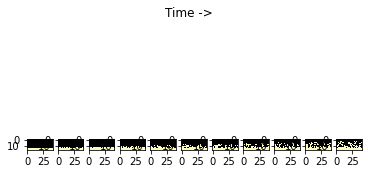

In [220]:
N = 10
fig, axes = plt.subplots(1, N+1)
data = initMatrix()
axes[0].imshow(data, interpolation='nearest', cmap="magma")
fig.suptitle('Time ->')
for i in range(N):
    data = nextMatrix(data)
    axes[i+1].imshow(data, interpolation='nearest', cmap="magma")
plt.show()

### Gif example

In [250]:
N = 100
imgs = list(range(N+1))
data = initMatrix()
imgs[0] = Image.fromarray(data * 255)
for i in range(N):
    data = nextMatrix(data)
    imgs[i+1] = Image.fromarray(data * 255)
imgs[0].save(f'fire_heat={HEAT}_o2={O2}_cinder={CINDER}.gif', save_all=True, append_images=imgs)